In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example Page
We are scraping data from pages of pitchers on [Baseball-Reference](https://www.baseball-reference.com/). Below is an example of one player's page, how the specific statistics were found in tags, tags were parsed into lists, then those lists were concatonated and then placed into a dataframe. This process can then be repeated on each page for different players to create a larger data set for analysis and modeling.

In [3]:
#Pull url for Liam Hendricks career
url = 'https://www.baseball-reference.com/players/h/hendrli01.shtml'
ex_page = requests.get(url)
#Read Liam Hendricks into a soup variable
ex_soup = BeautifulSoup(ex_page.text,'html')

#Identify the name of the player whose page we are on, place that in the name variable

name = ex_soup.find('div',attrs = {'itemtype':'https://schema.org/Person'}).find('span').text

#Find our column headers and place them in our dataframe
header = ex_soup.find('thead')
columns = ['Name']+[col.get_text() for col in header.find_all('th')] + ['HD','SV_Oppo','Blown_SV']
example = pd.DataFrame(columns = columns)

#Identify the rows we wish to scrape
rows = ex_soup.find_all('tr', attrs = {'class': 'full', 'id':re.compile("pitching_standard.")})

#Read all rows into lists, add them to a temporary data frame, then concatonate them with our final dataframe
SV_poptips = []
for row in rows:
    #Tags for the year and other stats are different, so they are added separately
    stats = [name]
    stats1 = [stat1.get_text() for stat1 in row.find_all('th')]
    stats2 = [stat2.get_text() for stat2 in row.find_all('td')]
    
    SV_poptips = row.find('td',attrs = {'class':re.compile('right poptip'), 'data-stat':'SV'})

    pop = str(SV_poptips.get('data-tip'))
    pop_list = pop.split('<br>')
    blown_SV = pop_list[1]
    SV_oppo = pop_list[2]
    holds = pop_list[4]
    holds_list = holds.split('&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: ')
    SV_oppo_list = SV_oppo.split('(S+BS): ')
    blown_SV_list = blown_SV.split('BlownSaves&nbsp;: ')
    expanded_saves = [int(holds_list[1]), int(SV_oppo_list[1]), int(blown_SV_list[1])]
    
    stats = stats + stats1 +stats2 + expanded_saves
    

    #Temporary dataframe
    temp_df = pd.DataFrame(stats).transpose()
    temp_df.columns = columns
    
    example = pd.concat([example,temp_df])
    
example

Name  Year Age   Tm  Lg  W  L   W-L%   ERA   G  GS  GF CG SHO  SV  \
0  Liam Hendriks  2011  22  MIN  AL  0  2   .000  6.17   4   4   0  0   0   0   
0  Liam Hendriks  2012  23  MIN  AL  1  8   .111  5.59  16  16   0  1   0   0   
0  Liam Hendriks  2013  24  MIN  AL  1  3   .250  6.85  10   8   1  0   0   0   
0  Liam Hendriks  2014  25  TOT  AL  1  2   .333  5.23   9   6   0  0   0   0   
0  Liam Hendriks  2015  26  TOR  AL  5  0  1.000  2.92  58   0  14  0   0   0   
0  Liam Hendriks  2016  27  OAK  AL  0  4   .000  3.76  53   0  10  0   0   0   
0  Liam Hendriks  2017  28  OAK  AL  4  2   .667  4.22  70   0  13  0   0   1   
0  Liam Hendriks  2018  29  OAK  AL  0  1   .000  4.13  25   8   1  0   0   0   
0  Liam Hendriks  2019  30  OAK  AL  4  4   .500  1.80  75   2  41  0   0  25   
0  Liam Hendriks  2020  31  OAK  AL  3  1   .750  1.78  24   0  20  0   0  14   

     IP    H   R  ER  HR  BB IBB   SO HBP BK WP   BF ERA+   FIP   WHIP    H9  \
0  23.1   29  16  16   3   6   0   16   0  0  1  100   67  4.10  1.500  11.2   
0  85.1  106  61  53  17  26   3   50   4  0  4  381   73  5.57  1.547  11.2   
0  47.1   67  39  36  10  14   1   34   3  0  1  224   60  5.44  1.711  12.7   
0  32.2   38  21  19   3   7   0   23   3  0  1  143   76  3.84  1.378  10.5   
0  64.2   59  23  21   3  11   1   71   2  0  4  261  141  2.14  1.082   8.2   
0  64.2   69  31  27   6  14   3   71   1  0  3  275  109  2.85  1.284   9.6   
0  64.0   57  34  30   7  23   0   78   0  0  6  273   99  3.22  1.250   8.0   
0  24.0   25  11  11   3  10   0   22   1  0  1  104  102  4.33  1.458   9.4   
0  85.0   61  18  17   5  21   5  124   2  0  7  332  237  1.87  0.965   6.5   
0  25.1   14   6   5   1   3   1   37   0  0  0   92  235  1.14  0.671   5.0   

   HR9  BB9   SO9   SO/W        Awards  HD SV_Oppo Blown_SV  
0  1.2  2.3   6.2   2.67                 0       0        0  
0  1.8  2.7   5.3   1.92                 0       0        0  
0  1.9  2.7   6.5   2.43                 0       0        0  
0  0.8  1.9   6.3   3.29                 1       0        0  
0  0.4  1.5   9.9   6.45                 6       2        2  
0  0.8  1.9   9.9   5.07                10       1        1  
0  1.0  3.2  11.0   3.39                16       4        3  
0  1.1  3.8   8.3   2.20                 1       0        0  
0  0.5  2.2  13.1   5.90            AS   8      32        7  
0  0.4  1.1  13.1  12.33  CYA-9,MVP-13   0      15        1

# Finding our data
Our data set should include pitchers from past years who have at some point in their careers have had a successful year of collecting saves, which we will consider as any top ten finish. By then collecting their statistics from their career, we will see a picture of pitchers when they are earning saves, before they were earning saves, and potentially after they were earning saves. 

Baseball-Reference has a page that lists the top ten finishers in saves for the past 100+ years, but [saves as a statistic changed in the mid 70s](https://www.mlb.com/news/how-save-rule-has-changed-baseball-c223677902) and [in the subsequent years bullpen usage changed drastically](https://sabr.org/journal/article/the-specialized-bullpen-history-analysis-and-strategic-models-for-success/). For that reason, we will be starting our data set with the top ten list in 1990, knowing that we will then collect some seasons prior to that by scraping from players' careers that stretch back further but wanting to reduce the noise from a bygone era. 

In [4]:
#Page containing list of top ten in saves across years, source for links to different player pages
list_url = 'https://www.baseball-reference.com/leaders/SV_top_ten.shtml'
list_response = requests.get(list_url)
list_page = list_response
list_soup = BeautifulSoup(list_page.text,'html')

In [5]:
# Collect the player links from 1990 Top Ten Lists onward
tables = list_soup.find_all('table')
modern = tables[0:30]

In [6]:
#We create a list that which is a contains each row from all the tables that contain the href code needed
rows = []
for table in modern:
    rows = rows + [row for row in table.find_all('tr')]   

In [7]:
#We create a new list and loop through our rows to pull out the link ending, then add it to the base url.
links = []

for row in rows:
    url_base = 'https://www.baseball-reference.com'
    link = row.find('a').get('href')
    links.append(url_base+link)
len(links)

316

In [8]:
#Some players appear on the top ten multiple years, we don't want them added twice to our data frame.
#We make a new list of links and only add a link from the original list if it not already in our list.
unique_links = [] 
[unique_links.append(x) for x in links if x not in unique_links]
len(unique_links)

129

In [9]:
#Create our dataframe for all players
full_df = pd.DataFrame(columns = columns)

#Populate the dataframe with statistics
SV_poptips = []
for link in unique_links:
    response = requests.get(link)
    soup = BeautifulSoup(response.text,'html')
    #Add name for player
    name = soup.find('div',attrs = {'itemtype':'https://schema.org/Person'}).find('span').text
    #Identify the rows we wish to scrape
    rows = soup.find_all('tr', attrs = {'class': 'full', 'id':re.compile("pitching_standard.")})
    #Read all rows into lists, add them to a temporary data frame, then concatonate them with our final dataframe
    for row in rows:
        #Tags for the year and other stats are different, so they are added separately
        stats_all = [name]
        stats_a = [stat_a.get_text() for stat_a in row.find_all('th')]
        stats_b = [stat_b.get_text() for stat_b in row.find_all('td')]
       
        #A few stats are hidden in a pop-up when hovering over saves, so we parse them separately.
        SV_poptips = row.find('td',attrs = {'class':re.compile('right poptip'), 'data-stat':'SV'})
        pop = str(SV_poptips.get('data-tip'))
        pop_list = pop.split('<br>')
        blown_SV = pop_list[1]
        SV_oppo = pop_list[2]
        holds = pop_list[4]
        holds_list = holds.split('&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: ')
        SV_oppo_list = SV_oppo.split('(S+BS): ')
        blown_SV_list = blown_SV.split('BlownSaves&nbsp;: ')
        expanded_saves = [int(holds_list[1]), int(SV_oppo_list[1]), int(blown_SV_list[1])]
        
        #Now we can add all three lists together to get our full set of statistics for a given year
        stats_all = stats_all + stats_a + stats_b + expanded_saves
        
        #Let's convert each statistic into either a float or a string. 
        #Using the pandas convert methods wasn't getting the results needed working on the final DF
        num_stats = []
        for stat in stats_all:
            try:
                num_stats.append(float(stat))
            except ValueError:
                num_stats.append(str(stat))
        
        #Temporary dataframe
        temporary_df = pd.DataFrame(num_stats).transpose()
        temporary_df.columns = columns
    
        full_df = pd.concat([full_df,temporary_df],ignore_index=True)

full_df

Name  Year Age   Tm   Lg  W  L   W-L%    ERA   G  GS  GF CG  \
0         Brad Hand  2011  21  FLA   NL  1  8  0.111    4.2  12  12   0  0   
1         Brad Hand  2012  22  MIA   NL  0  1      0  17.18   1   1   0  0   
2         Brad Hand  2013  23  MIA   NL  1  1    0.5   3.05   7   2   2  0   
3         Brad Hand  2014  24  MIA   NL  3  8  0.273   4.38  32  16   5  0   
4         Brad Hand  2015  25  MIA   NL  4  7  0.364    5.3  38  12   7  0   
...             ...   ...  ..  ...  ... .. ..    ...    ...  ..  ..  .. ..   
1460  Bobby Thigpen  1990  26  CHW   AL  4  6    0.4   1.83  77   0  73  0   
1461  Bobby Thigpen  1991  27  CHW   AL  7  5  0.583   3.49  67   0  58  0   
1462  Bobby Thigpen  1992  28  CHW   AL  1  3   0.25   4.75  55   0  40  0   
1463  Bobby Thigpen  1993  29  TOT  MLB  3  1   0.75   5.83  42   0  16  0   
1464  Bobby Thigpen  1994  30  SEA   AL  0  2      0   9.39   7   0   3  0   

     SHO  SV    IP    H   R  ER  HR  BB IBB  SO HBP BK WP   BF ERA+   FIP  \
0      0   0    60   53  32  28  10  35   1  38   1  1  0  263   93  5.73   
1      0   0   3.2    6   7   7   1   6   1   3   0  0  0   23   26  9.91   
2      0   0  20.2   13   7   7   2   8   0  15   0  0  1   82  129  4.02   
3      0   1   111  112  56  54  10  39   3  67   2  0  5  474   85   4.2   
4      0   0  93.1  107  55  55   9  32   1  67   3  0  2  408   72  4.08   
...   ..  ..   ...  ...  ..  ..  ..  ..  ..  ..  .. .. ..  ...  ...   ...   
1460   0  57  88.2   60  20  18   5  32   3  70   1  0  2  347  211  3.08   
1461   0  30  69.2   63  32  27  10  38   8  47   4  0  2  309  115  5.18   
1462   0  22    55   58  29  29   4  33   5  45   3  0  0  253   82  4.06   
1463   0   1    54   74  38  35   7  21   1  29   6  1  0  254   72   5.1   
1464   0   0   7.2   12   9   8   3   5   0   4   0  0  0   40   54  9.13   

       WHIP    H9  HR9   BB9  SO9  SO/W          Awards HD SV_Oppo Blown_SV  
0     1.467     8  1.5   5.3  5.7  1.09                  0       0        0  
1     3.273  14.7  2.5  14.7  7.4   0.5                  0       0        0  
2     1.016   5.7  0.9   3.5  6.5  1.88                  0       0        0  
3      1.36   9.1  0.8   3.2  5.4  1.72                  0       1        0  
4     1.489  10.3  0.9   3.1  6.5  2.09                  2       0        0  
...     ...   ...  ...   ...  ...   ...             ... ..     ...      ...  
1460  1.038   6.1  0.5   3.2  7.1  2.19  AS,CYA-4,MVP-5  0      65        8  
1461   1.45   8.1  1.3   4.9  6.1  1.24                  0      39        9  
1462  1.655   9.5  0.7   5.4  7.4  1.36                  3      29        7  
1463  1.759  12.3  1.2   3.5  4.8  1.38                  1       4        3  
1464  2.217  14.1  3.5   5.9  4.7   0.8                  0       0        0  

[1465 rows x 39 columns]

In [10]:
import pickle
with open('closer_data_bbref2.pickle', 'wb') as to_write:
    pickle.dump(full_df, to_write)

# Once we have our data, we want to clean it and engineer a few features

Below, we identify a few cleaning steps and new features:  
* Baseball-Reference has blank values that will be easier to replace as NaN  
* Our data should already be in the data types preferred, but we'll do a conversion as a safety check  
* We will not be using data from 2020 for any player, as the season is anamolous due to COVID-19  
* We will not be considering win loss percentage or awards, so we drop those columns

* Team Change is a categorical variable that shows 1 if the player changed teams, 0 otherwise
* We create a few different features of cumulative saves: Total, Previous Year, Two Previous Years, and related Sums
* Since many individual statistics are more related to number of appearances, rather than quality, we create two new features: Number of Batters Faced per Appearance and Number of Mistakes (balks, wild pitches, HBP) per Appearance
* We need the value we are predicting, which is next years saves. We call that Target Saves.

In [233]:
#Replace blank values with nan
full_df.replace(r'^\s*$', np.nan, regex=True,inplace=True)

#Convert data types as needed
full_df = full_df.convert_dtypes()

#Make a copy of full_df to preserve full_df
metric_df = full_df.copy()

#Create a column that represents a team change (0 is same team as before, 1 is new team)
metric_df['Team_Change'] = ((metric_df['Name'] == metric_df['Name'].shift()) &
                            (metric_df['Tm'] != metric_df['Tm'].shift()))
metric_df['Team_Change'] = metric_df['Team_Change'].fillna(0)
metric_df['Team_Change'] = metric_df['Team_Change'].astype(int)

#Create a column for cumulative saves up to the current row for a player
metric_df['Cumulative_Saves'] = metric_df.groupby('Name')['SV'].cumsum()

#Create a column for the previous year's saves
metric_df['Previous_Year_SV'] = metric_df.groupby('Name')['SV'].shift(1)
metric_df['Previous_Year_SV'].fillna(0,inplace=True)

#Create a columns for the previous two and three years of cumulative saves
metric_df['Two_Year_Ago'] = metric_df.groupby('Name')['SV'].shift(2)
metric_df['Two_Year_Ago'].fillna(0,inplace=True)

metric_df['Two_Year_Sum'] = metric_df['SV'] + metric_df['Previous_Year_SV']
metric_df['Three_Year_Sum'] = metric_df['Two_Year_Sum'] + metric_df['Two_Year_Ago']

#Create a column for a metric for batters faced per appearance
metric_df['BF/G'] = metric_df['BF'] / metric_df['G']
metric_df['BF/G'].fillna(0,inplace=True)

#Create a column for mistakes, in general (HBP, WP, BK), then make it per appearance
metric_df['Mistakes/G'] = (metric_df['HBP'] + metric_df['WP'] + metric_df['BK']) / metric_df['G']
metric_df['Mistakes/G'].fillna(0, inplace=True)

#Create a column for the following year's saves, which will be our target
metric_df['Target_SV'] = metric_df.groupby('Name')['SV'].shift(-1)
metric_df['Target_SV'].fillna(0,inplace=True)

metric_df.drop(columns = ['Awards','W-L%'],inplace=True)
metric_df.dropna(inplace=True)
metric_df.reset_index(drop=True, inplace=True)

#Set aside 2019 stats for future predictions
df_2019 = metric_df[metric_df['Year'] == 2019]

#Remove 2020 stats from our model as the season was only 60 games
metric_df = metric_df[metric_df['Year'] != 2020]

#Drop the last season of each player's career (no true target) and 2019 (since 2020 target is flawed)
metric_df = metric_df[metric_df.groupby('Name').cumcount(ascending=False) > 0]

metric_df = metric_df[metric_df['SV'] > 2]

X = metric_df.drop(columns='Target_SV')
y = metric_df['Target_SV']
metric_df.tail(40)

Name  Year  Age   Tm   Lg  W  L   ERA   G  GS  GF  CG  SHO  SV  \
1386    Gregg Olson  1999   32  ARI   NL  9  4  3.71  61   0  36   0    0  14   
1393   Jeff Russell  1987   25  TEX   AL  5  4  4.44  52   2  12   0    0   3   
1395   Jeff Russell  1989   27  TEX   AL  6  4  1.98  71   0  66   0    0  38   
1396   Jeff Russell  1990   28  TEX   AL  1  5  4.26  27   0  22   0    0  10   
1397   Jeff Russell  1991   29  TEX   AL  6  4  3.29  68   0  56   0    0  30   
1398   Jeff Russell  1992   30  TOT   AL  4  3  1.63  59   0  46   0    0  30   
1399   Jeff Russell  1993   31  BOS   AL  1  4  2.70  51   0  48   0    0  33   
1400   Jeff Russell  1994   32  TOT   AL  1  6  5.09  42   0  36   0    0  17   
1401   Jeff Russell  1995   33  TEX   AL  1  0  3.03  37   0  32   0    0  20   
1405     Steve Farr  1986   29  KCR   AL  8  4  3.13  56   0  33   0    0   8   
1407     Steve Farr  1988   31  KCR   AL  5  4  2.50  62   1  49   0    0  20   
1408     Steve Farr  1989   32  KCR   AL  2  5  4.12  51   2  40   0    0  18   
1410     Steve Farr  1991   34  NYY   AL  5  5  2.19  60   0  48   0    0  23   
1411     Steve Farr  1992   35  NYY   AL  2  2  1.56  50   0  42   0    0  30   
1412     Steve Farr  1993   36  NYY   AL  2  2  4.21  49   0  37   0    0  25   
1415   Jeff Reardon  1980   24  NYM   NL  8  7  2.61  61   0  35   0    0   6   
1416   Jeff Reardon  1981   25  TOT   NL  3  0  2.18  43   0  33   0    0   8   
1417   Jeff Reardon  1982   26  MON   NL  7  4  2.06  75   0  53   0    0  26   
1418   Jeff Reardon  1983   27  MON   NL  7  9  3.03  66   0  53   0    0  21   
1419   Jeff Reardon  1984   28  MON   NL  7  7  2.90  68   0  58   0    0  23   
1420   Jeff Reardon  1985   29  MON   NL  2  8  3.18  63   0  50   0    0  41   
1421   Jeff Reardon  1986   30  MON   NL  7  9  3.94  62   0  48   0    0  35   
1422   Jeff Reardon  1987   31  MIN   AL  8  8  4.48  63   0  58   0    0  31   
1423   Jeff Reardon  1988   32  MIN   AL  2  4  2.47  63   0  58   0    0  42   
1424   Jeff Reardon  1989   33  MIN   AL  5  4  4.07  65   0  61   0    0  31   
1425   Jeff Reardon  1990   34  BOS   AL  5  3  3.16  47   0  37   0    0  21   
1426   Jeff Reardon  1991   35  BOS   AL  1  4  3.03  57   0  51   0    0  40   
1427   Jeff Reardon  1992   36  TOT  MLB  5  2  3.41  60   0  50   0    0  30   
1428   Jeff Reardon  1993   37  CIN   NL  4  6  4.09  58   0  32   0    0   8   
1432     Rob Dibble  1990   26  CIN   NL  8  3  1.74  68   0  29   0    0  11   
1433     Rob Dibble  1991   27  CIN   NL  3  5  3.17  67   0  57   0    0  31   
1434     Rob Dibble  1992   28  CIN   NL  3  5  3.07  63   0  49   0    0  25   
1435     Rob Dibble  1993   29  CIN   NL  1  4  6.48  45   0  37   0    0  19   
1437  Bobby Thigpen  1986   22  CHW   AL  2  0  1.77  20   0  14   0    0   7   
1438  Bobby Thigpen  1987   23  CHW   AL  7  5  2.73  51   0  37   0    0  16   
1439  Bobby Thigpen  1988   24  CHW   AL  5  8  3.30  68   0  59   0    0  34   
1440  Bobby Thigpen  1989   25  CHW   AL  2  6  3.76  61   0  56   0    0  34   
1441  Bobby Thigpen  1990   26  CHW   AL  4  6  1.83  77   0  73   0    0  57   
1442  Bobby Thigpen  1991   27  CHW   AL  7  5  3.49  67   0  58   0    0  30   
1443  Bobby Thigpen  1992   28  CHW   AL  1  3  4.75  55   0  40   0    0  22   

         IP    H   R  ER  HR  BB  IBB   SO  HBP  BK  WP   BF  ERA+   FIP  \
1386   60.2   54  28  25   9  25    2   45    2   0   1  257   124  4.91   
1393   97.1  109  56  48   9  52    5   56    2   1   6  442   101  4.59   
1395   72.2   45  21  16   4  24    5   77    3   0   6  278   201  2.47   
1396   25.1   23  15  12   1  16    5   16    0   0   2  111    93  3.95   
1397   79.1   71  36  29  11  26    1   52    1   0   6  336   124  4.37   
1398   66.1   55  14  12   3  25    3   48    2   0   3  276   237  3.14   
1399   46.2   39  16  14   1  14    1   45    1   0   2  189   173  2.30   
1400   40.2   43  25  23   5  16    2   28    1   0   1  179    98  4.61   
1401   32

In [234]:
metric_df[metric_df['Two_Year_Sum']=='NaN']
metric_df['Two_Year_Sum'].isnull().sum()
metric_df.isnull().sum()

Name                0
Year                0
Age                 0
Tm                  0
Lg                  0
W                   0
L                   0
ERA                 0
G                   0
GS                  0
GF                  0
CG                  0
SHO                 0
SV                  0
IP                  0
H                   0
R                   0
ER                  0
HR                  0
BB                  0
IBB                 0
SO                  0
HBP                 0
BK                  0
WP                  0
BF                  0
ERA+                0
FIP                 0
WHIP                0
H9                  0
HR9                 0
BB9                 0
SO9                 0
SO/W                0
HD                  0
SV_Oppo             0
Blown_SV            0
Team_Change         0
Cumulative_Saves    0
Previous_Year_SV    0
Two_Year_Ago        0
Two_Year_Sum        0
Three_Year_Sum      0
BF/G                0
Mistakes/G          0
Target_SV 

In [237]:
smaller_df = metric_df.drop(columns=['W','L','WHIP','HR9','ERA','Three_Year_Sum','Cumulative_Saves','IP','HR','BF','Year','Name','Tm','Lg','GS','CG','SHO','Previous_Year_SV','Two_Year_Ago','HBP','BK','WP','R','ER','H','BB','IBB','SO'])
smaller_df.sample(20)

Age   G  GF  SV  ERA+   FIP    H9  BB9   SO9  SO/W  HD  SV_Oppo  \
749    27  68  40  15   126  3.97   8.0  4.7   8.7  1.85   8       20   
612    27  77  70  38   167  2.01   4.6  6.0  16.0  2.65   0       43   
894    24  62  35   8   131  4.12   8.4  3.1   4.9  1.57   6        8   
351    30  60  53  36   200  2.16   4.8  2.9  14.6  5.00   0       38   
1182   36  68  64  38   113  3.65   9.1  1.8   6.9  3.80   0       49   
1397   29  68  56  30   124  4.37   8.1  2.9   5.9  2.00   0       40   
1408   32  51  40  18    95  3.11  10.7  3.1   8.0  2.55   2       22   
1017   30  54  46  21   100  4.60   6.3  5.3   9.3  1.75   0       24   
752    30  65  53  28    95  4.58   8.2  5.1   8.1  1.58   0       32   
776    29  69  61  36   178  2.11   6.9  3.3  12.8  3.85   0       41   
569    36  68  63  37   161  4.02   6.3  2.8   5.4  1.91   0       43   
905    26  67  31   9   222  2.84   6.2  1.8  10.5  5.86  22       13   
896    26  66  57  30   185  4.59   8.0  4.1   5.2  1.26   0       35   
777    30  65  57  38   335  2.14   5.2  2.5  10.7  4.30   1       42   
895    25  75  56  27   152  4.44   7.3  4.0   5.6  1.41   0       36   
883    33  68  60  33   100  5.92  11.0  5.2   5.5  1.05   1       38   
1120   28  73  66  37   119  3.32   8.6  1.0   6.8  6.63   1       45   
1102   32  71  38  15   145  2.98   7.1  3.5   8.9  2.55  14       17   
159    30  45  40  27   232  2.29   6.9  3.3   9.8  2.94   0       30   
416    31  64  61  36   284  1.68   5.0  2.1  12.5  5.94   0       38   

      Blown_SV  Team_Change  Two_Year_Sum      BF/G  Mistakes/G  Target_SV  
749          5            0            20  6.500000    0.161765         17  
612          5            0            53  4.311688    0.155844         34  
894          0            1             8  5.483871    0.096774         27  
351          2            1            37  4.100000    0.116667         12  
1182        11            0            64  4.514706    0.029412         14  
1397        10            0            40  4.941176    0.102941         30  
1408         4            0            38  5.470588    0.058824          1  
1017         3            1            53  4.333333    0.092593         10  
752          4            0            59  4.292308    0.107692         30  
776          5            0            39  4.202899    0.101449         38  
569          6            0            77  4.029412    0.117647          2  
905          4            0            10  6.134328    0.059701         34  
896          5            0            57  5.878788    0.106061         32  
777          4            1            74  4.153846    0.061538          3  
895          9            0            35  6.053333    0.066667         30  
883          5            1            34  4.779412    0.161765          1  
1120         8            0            72  3.849315    0.041096         51  
1102         2            1            21  4.408451    0.084507         40  
159          3            0            44  3.911111    0.155556         32  
416          2            0            79  4.093750    0.062500         37

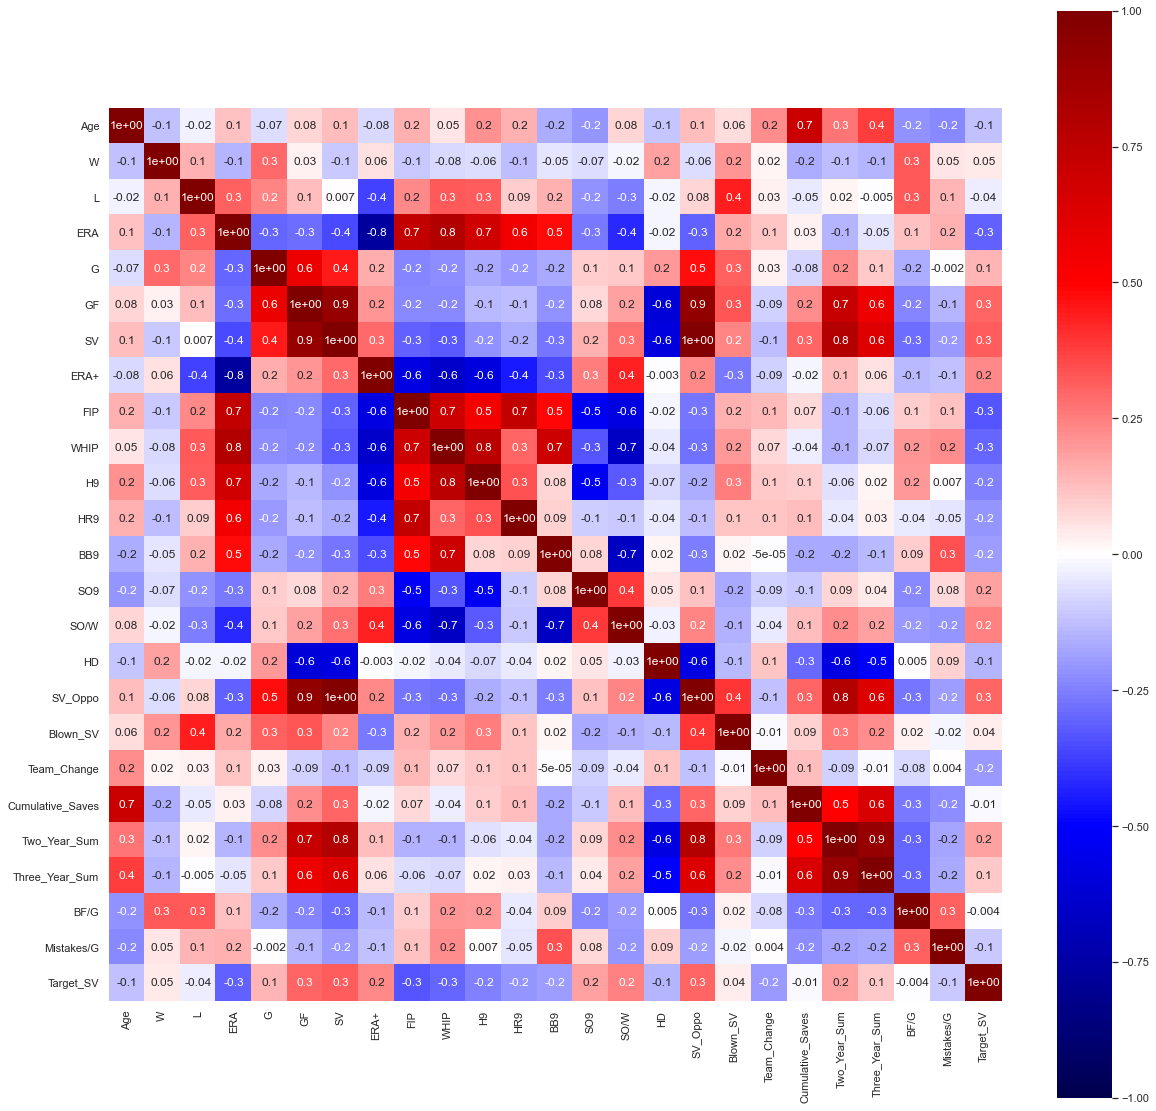

In [126]:
smaller_df.dropna(inplace=True)
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(smaller_df.corr(), cmap='seismic',annot=True, fmt=".1", vmin=-1,vmax=1,square=True);

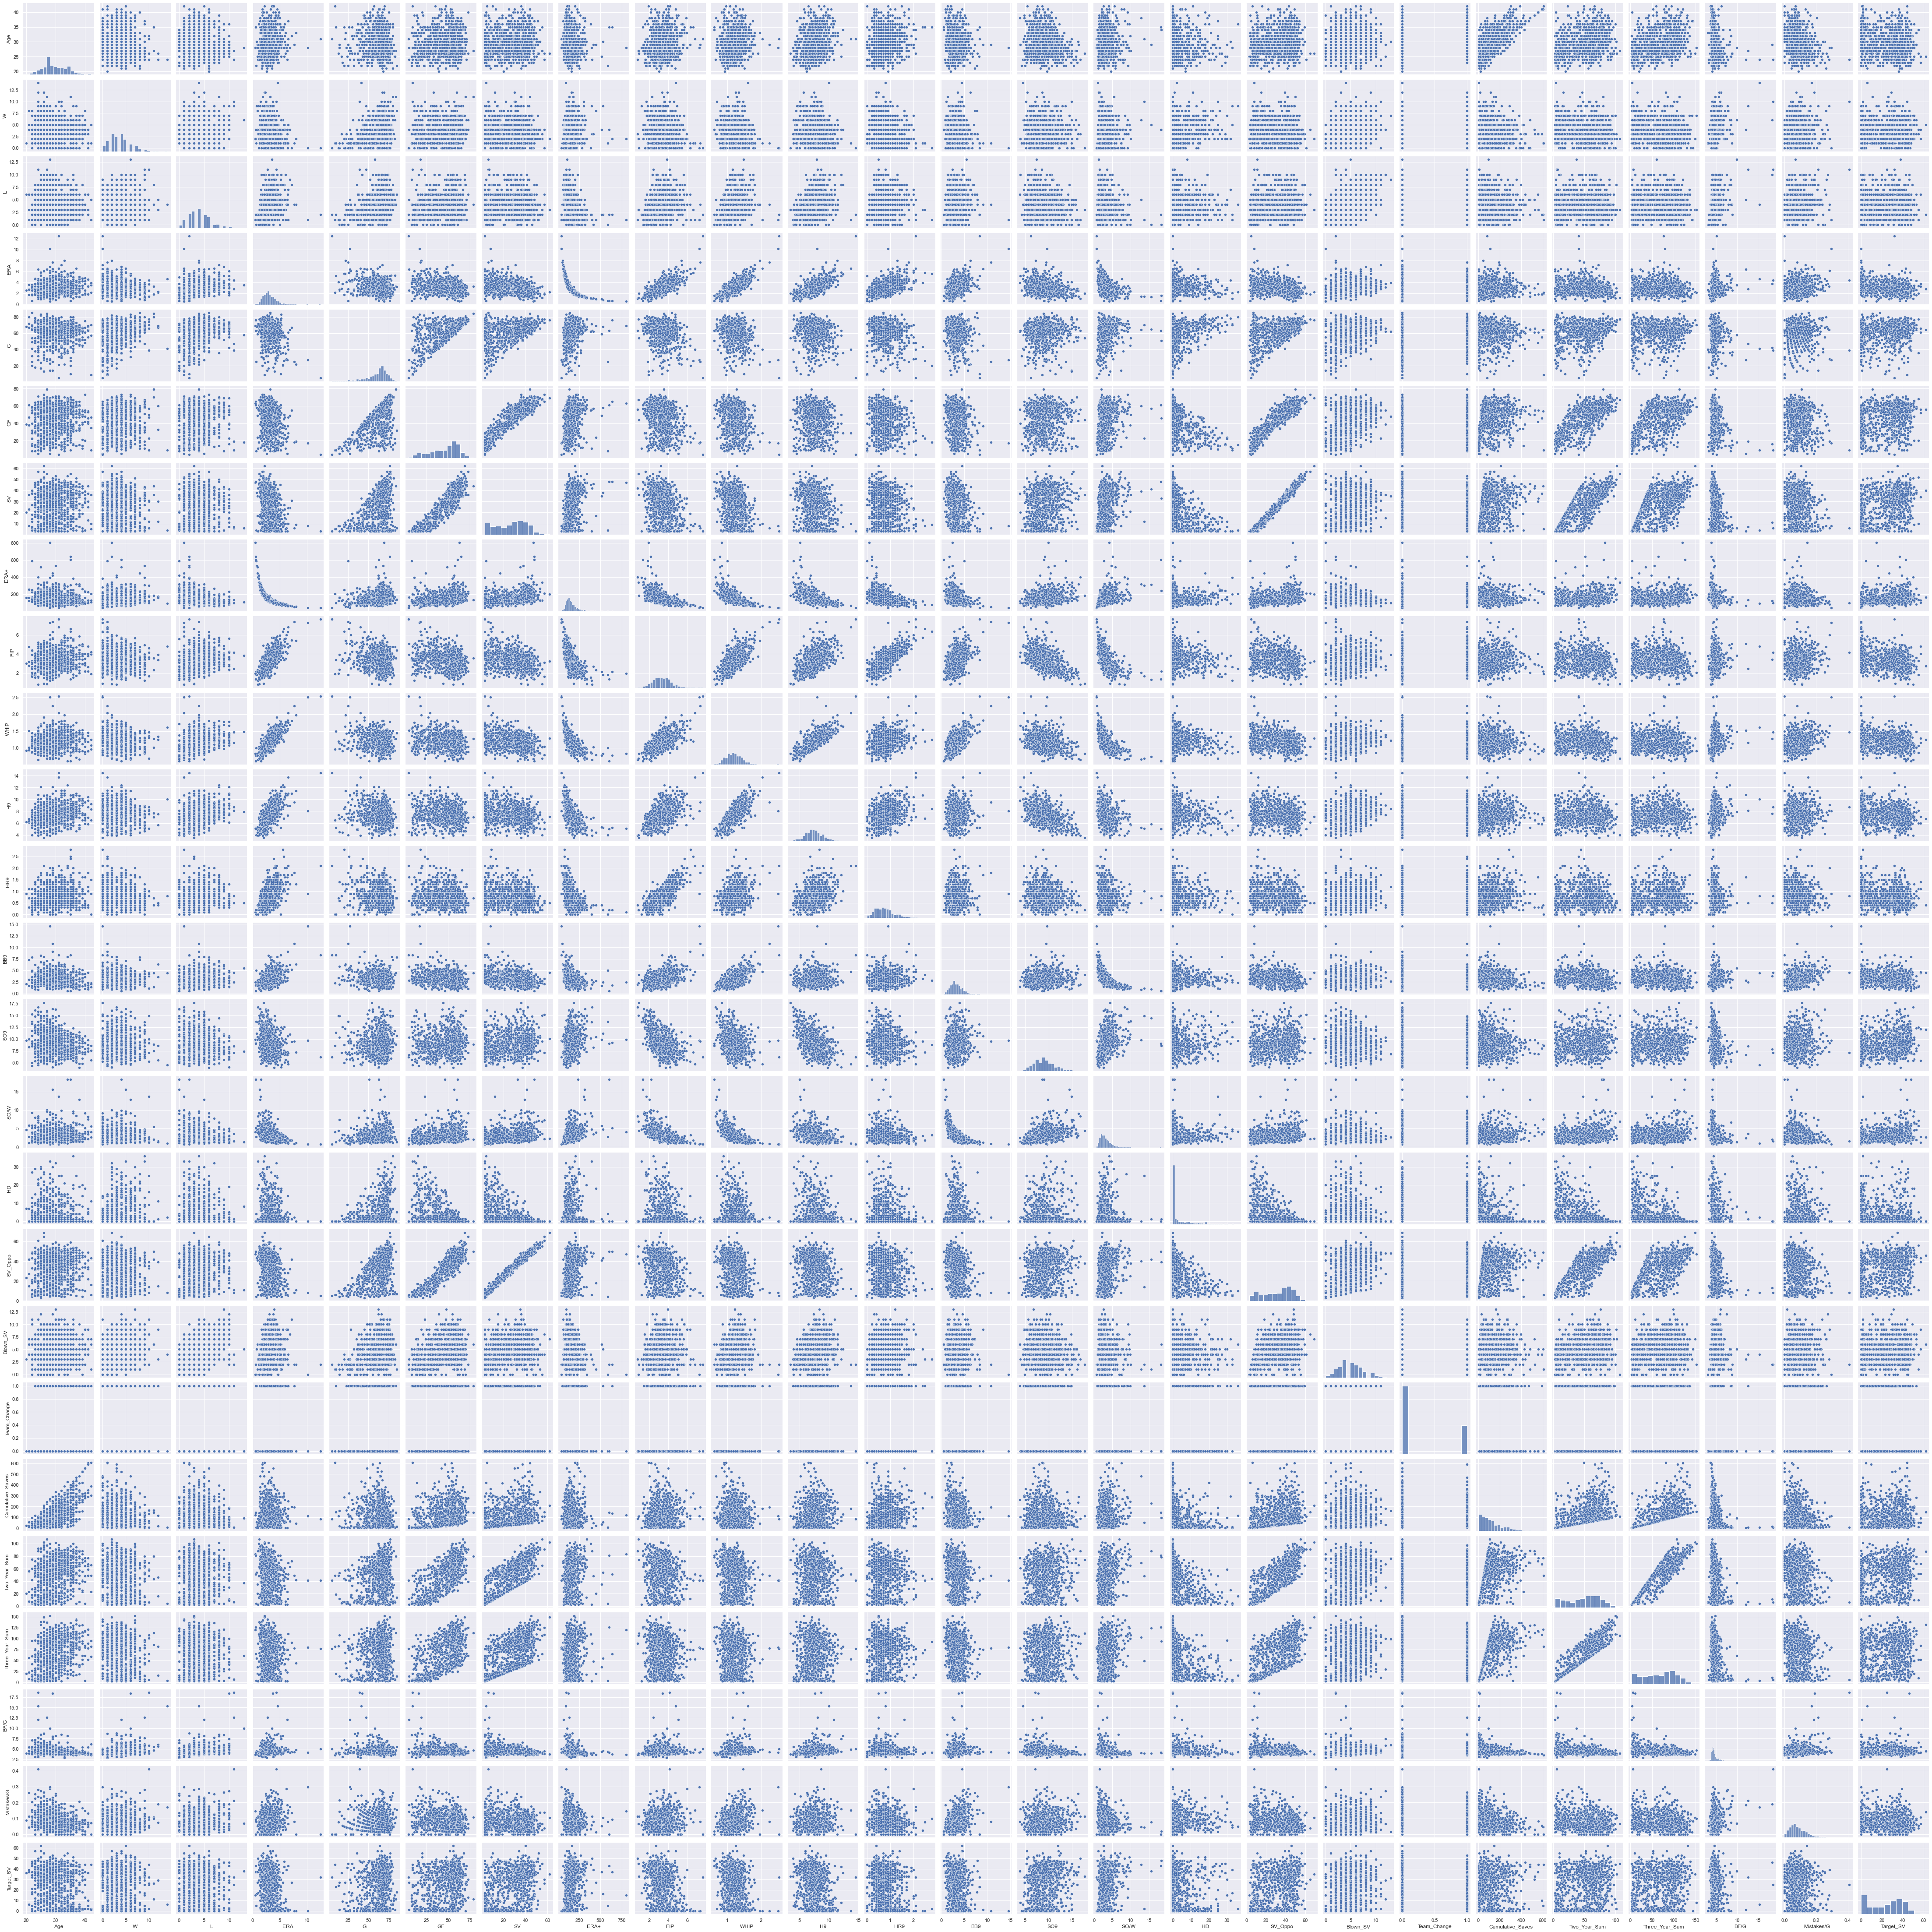

In [127]:
sns.pairplot(smaller_df)

In [128]:
from pandas_profiling import ProfileReport
profile = ProfileReport(smaller_df, title="Profile Report on Predicting Saves", plot={'histogram': {'bins': 8}}, minimal=True)
profile.to_widgets()

# Notes from Heatmap  
## The features that show strongest correlation with the target saves value are:

Games Finished and Saves (.6)  
Two year sum of saves (.5)  
Three year sum of saves (.4)  
Cumulative sum of saves (.5)  

## The features showing smaller correlation include:

Age (.3)  
Games (.3)  
SO/W (.3)  
SO/9(.2)  
R (-.2)  
ER (-.2)  
H (-.2)  
BB (-.2)

## A few initial thoughts

Some of these statistics are probably overlapping in many ways. H and BB are important but they are also an indicator of Games or Innings Pitched. That's especially clear by WHIP having a lower correlation than either, despite being a metric that shows those two values combined. So, maybe I'll make a model using Games and WHIP, but not H or BB. A similar arguments could be made for other stats such as R, ER, and ERA. Again, if I'm including Games or Innings Pitched, I think it makes the most sense to drop R and ER and use ERA as a feature. The same will be done with SO vs. SO/9, BF.

I should also reconsider the initial size of our data set in terms of starting year. The low positive correlation between saves and years gives me hesitation. If saves are generally increasing across this time frame, am I gaining useful intelligence from earlier years? Maybe I should start in the mid 80s or 1990?

# Notes from second heatmap with above changes made

Our new statistics (BF/G and Mistakes/G) both show low negative correlations with our target saves columns

In [247]:
modeling = smaller_df.copy()

X = modeling.drop(columns='Target_SV')
y = modeling['Target_SV']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2)

X.head()

Age   G  GF  SV  ERA+   FIP   H9  BB9   SO9  SO/W  HD  SV_Oppo  Blown_SV  \
6    27  72  32  21   196  3.03  6.1  2.3  11.8  5.20  16       26         5   
7    28  69  42  32   148  3.20  6.5  3.5  13.3  3.79  10       39         7   
21   24  55  14  12   168  2.23  4.0  3.3  15.8  4.77  21       17         5   
27   27  57  48  37   211  2.92  6.8  2.4  11.3  4.73   1       40         3   
28   28  65  53  47   130  3.37  7.7  3.1   7.8  2.52   1       53         6   

    Team_Change  Two_Year_Sum      BF/G  Mistakes/G  
6             0            22  4.319444    0.152778  
7             1            53  4.362319    0.159420  
21            0            12  5.563636    0.036364  
27            0            37  3.964912    0.052632  
28            0            84  4.323077    0.107692

In [248]:
tr_X, valid_X, tr_y, valid_y = train_test_split(train_X, train_y, test_size = .25)


In [241]:
print(tr_X.shape)
print(train_X.shape)
print(test_X.shape)
print(valid_X.shape)

tr_X.sample(20)

(486, 17)
(648, 17)
(163, 17)
(162, 17)


Age   G  GF  SV  ERA+   FIP   H9  BB9   SO9  SO/W  HD  SV_Oppo  \
797    24  39   9   6    99  4.14  8.7  4.5   7.1  1.59   0        8   
414    29  73  63  44   294  2.16  6.0  2.9  11.1  3.87   0       47   
986    25  68  62  33   193  3.36  8.9  2.1   6.9  3.33   0       38   
966    32  58  50  40   232  3.03  6.1  4.0  10.9  2.72   0       44   
376    33  66  52  39   185  2.53  6.1  2.0   8.5  4.20   0       43   
1288   25  66  56  29   229  2.84  6.1  3.6   7.9  2.22   1       33   
1371   28  65  57  43   120  3.91  8.1  6.4   8.7  1.36   1       49   
265    24  69  58  47   263  2.72  6.4  3.5  12.1  3.50   0       51   
1004   27  56  49  17   131  4.32  9.2  3.6   6.1  1.68   0       22   
75     29  72  48  33   190  2.09  6.5  1.4   9.0  6.45  14       37   
501    32  60  55  26   140  3.78  5.9  4.6   9.0  1.97   0       29   
63     23  74  15   3   143  1.91  7.5  2.4  12.9  5.40  29        8   
554    29  74  39  15   123  3.19  8.1  4.1   6.8  1.64   8       21   
682    29  70  59  37   148  2.70  6.5  2.7  12.3  4.63   0       44   
408    41  64  54  44   226  2.19  6.9  1.2   8.8  7.50   0       49   
351    30  60  53  36   200  2.16  4.8  2.9  14.6  5.00   0       38   
1116   24  76  71  48   181  3.23  6.5  1.5   9.8  6.62   0       52   
1253   28  56  32   7   114  3.61  6.6  4.4   8.4  1.91   3        9   
701    30  66  34  19   133  3.88  7.3  4.0  11.8  2.93   7       27   
484    26  61  53  39   109  3.34  7.6  2.5   9.2  3.69   0       43   

      Blown_SV  Team_Change  Two_Year_Sum       BF/G  Mistakes/G  
797          2            0             6  18.615385    0.410256  
414          3            1            44   3.890411    0.095890  
986          5            0            64   4.794118    0.044118  
966          4            0            79   3.931034    0.086207  
376          4            0            68   3.924242    0.090909  
1288         4            0            46   6.257576    0.121212  
1371         6            0            72   4.323077    0.123077  
265          4            0            92   4.289855    0.159420  
1004         5            0            41   4.232143    0.053571  
75           4            0            49   3.847222    0.083333  
501          3            1            51   4.316667    0.100000  
63           5            0             3   4.202703    0.121622  
554          6            1            52   4.067568    0.067568  
682          7            0            79   4.600000    0.100000  
408          5            0            77   3.640625    0.046875  
351          2            1            37   4.100000    0.116667  
1116         4            0            65   4.065789    0.092105  
1253         2            0            22   6.803571    0.125000  
701          8            0            51   4.348485    0.151515  
484          4            0            75   3.967213    0.032787

In [132]:

tr_X.isnull().sum()

Age                 0
W                   0
L                   0
ERA                 0
G                   0
GF                  0
SV                  0
IP                  0
HR                  0
BF                  0
ERA+                0
FIP                 0
WHIP                0
H9                  0
HR9                 0
BB9                 0
SO9                 0
SO/W                0
HD                  0
SV_Oppo             0
Blown_SV            0
Team_Change         0
Cumulative_Saves    0
Two_Year_Sum        0
Three_Year_Sum      0
BF/G                0
Mistakes/G          0
dtype: int64

# Minimum Viable Product
Predict our target saves using the previous year's saves as our feature. 

In [249]:
X_mvp = modeling[['SV']]
y = modeling['Target_SV']

from sklearn.model_selection import train_test_split
mvp_train_X, mvp_test_X, mvp_train_y, mvp_test_y = train_test_split(X_mvp, y, test_size = .2)

In [250]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
train_mvp_X, train_mvp_y = np.array(mvp_train_X), np.array(mvp_train_y)
#run the CV
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_mvp_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(train_mvp_X,train_mvp_y):
    
    _X, _y = train_mvp_X[train_ind], train_mvp_y[train_ind]
    X_val, y_val = train_mvp_X[val_ind], train_mvp_y[val_ind] 
    
    #simple linear regression
    mvp = LinearRegression()

    mvp.fit(_X, _y)
    cv_mvp_r2s.append(round(mvp.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_mvp_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_mvp_r2s):.3f} +- {np.std(cv_mvp_r2s):.3f}', '\n')

preds_mvp_test = mvp.predict(mvp_test_X)
RMSE_mvp = np.sqrt(mean_squared_error(mvp_test_y,preds_mvp_test))

print('The average error on a predicted value is: ',RMSE_mvp)

Simple regression scores:  [0.044, 0.091, 0.095, 0.068, 0.009] 

Simple mean cv r^2: 0.061 +- 0.032 

The average error on a predicted value is:  15.197382912283059


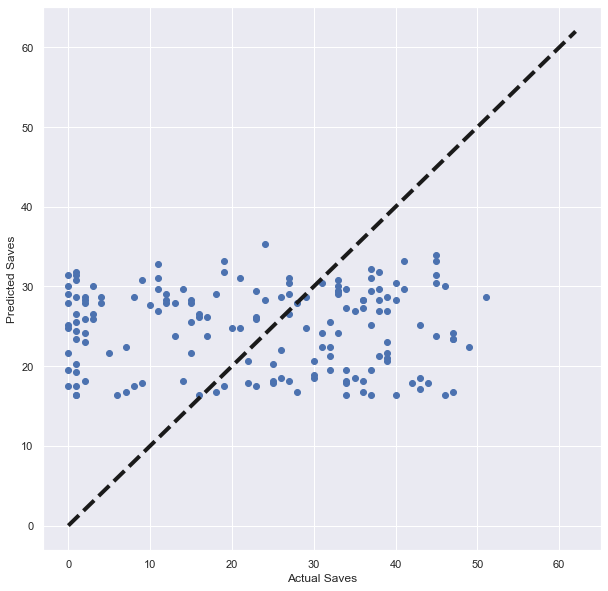

In [251]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, preds_mvp_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Model on Multiple Features

In [245]:
model_1 = LinearRegression()
model_1.fit(tr_X, tr_y)
score = model_1.score(tr_X, tr_y)
print('The coefficient of determination for model_1 on the training data is: ',score )
print(f'In other words, approximately {score} of the variability in saves can be explained by the linear model','\n')


test_score = model_1.score(test_X, test_y)
print('The coefficient of determination for model_1 on the test data is: ',test_score )
print(f'In other words, approximately {test_score} of the variability in saves can be explained by the linear model')

The coefficient of determination for model_1 on the training data is:  0.2240324102459974
In other words, approximately 0.2240324102459974 of the variability in saves can be explained by the linear model 

The coefficient of determination for model_1 on the test data is:  0.2521407500152354
In other words, approximately 0.2521407500152354 of the variability in saves can be explained by the linear model


In [206]:
from sklearn.metrics import mean_squared_error
preds_train = model_1.predict(tr_X)
RMSE_train_1 = np.sqrt(mean_squared_error(tr_y,preds_train))

print('The error on the training data is: ',RMSE_train_1)

preds_test = model_1.predict(test_X)
RMSE_model_1 = np.sqrt(mean_squared_error(test_y,preds_test))

print('The error on the test data is: ',RMSE_model_1)

The error on the training data is:  13.290690268966651
The error on the test data is:  14.43926445010763


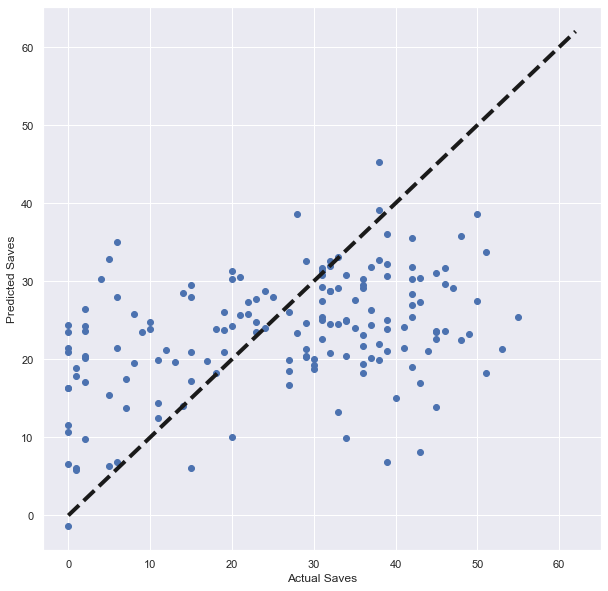

In [207]:
fig, ax = plt.subplots()
ax.scatter(test_y, preds_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

# K Fold Cross-Val on Simple Linear Regression

In [208]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

train_X1, train_y1 = np.array(train_X), np.array(train_y)
#run the CV
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(train_X,train_y):
    
    _X, _y = train_X1[train_ind], train_y1[train_ind]
    X_val, y_val = train_X1[val_ind], train_y1[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(_X, _y)
    cv_lm_r2s.append(round(lm.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_lm_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

preds_kfoldlinear_test = lm.predict(test_X)
RMSE_kfoldlinear = np.sqrt(mean_squared_error(test_y,preds_kfoldlinear_test))

print('The average error on a predicted value is: ', RMSE_kfoldlinear)

Simple regression scores:  [0.114, 0.26, 0.047, 0.212, 0.183] 

Simple mean cv r^2: 0.163 +- 0.075
The average error on a predicted value is:  14.438718468228966


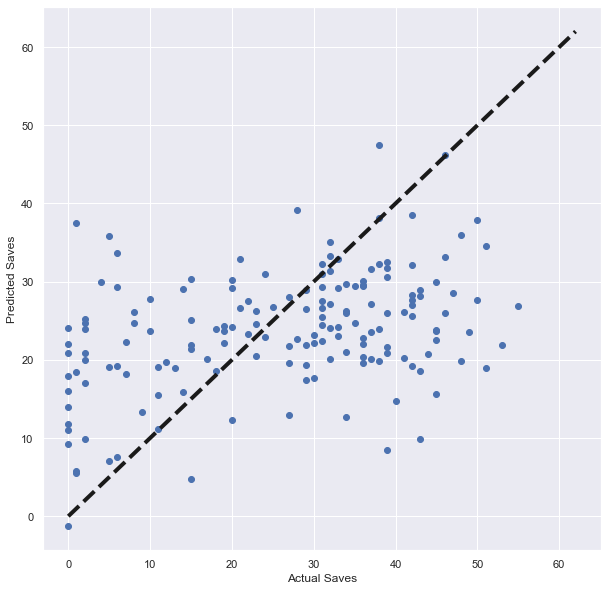

In [209]:
fig, ax = plt.subplots()
ax.scatter(test_y, preds_kfoldlinear_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

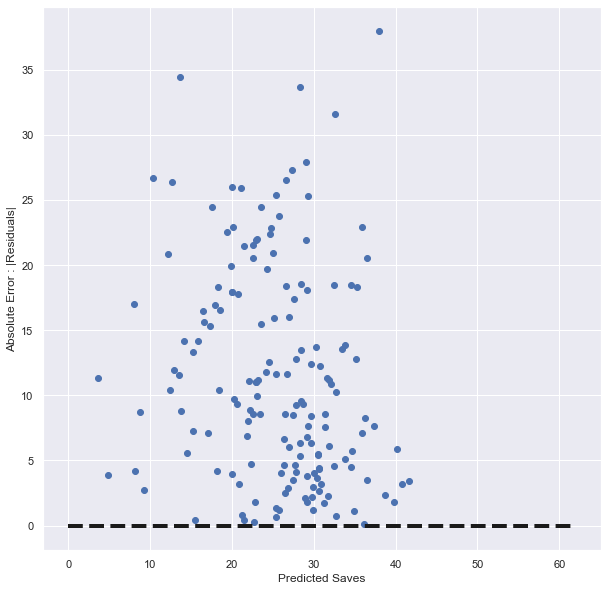

In [142]:
fig, ax = plt.subplots()
ax.scatter(preds_kfoldlinear_test, np.absolute(test_y-preds_kfoldlinear_test))
ax.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
ax.set_xlabel('Predicted Saves')
ax.set_ylabel('Absolute Error : |Residuals|')
plt.show()

# K Fold Cross-Val on Polynomial Model of Degree 2

In [210]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_poly_r2s = []

for train_ind, val_ind in kf.split(train_X, train_y):    
    
    _X, _y = train_X1[train_ind], train_y1[train_ind]
    X_val, y_val = train_X1[val_ind], train_y1[val_ind] 
    
    #poly with degree 2
    poly = PolynomialFeatures(degree=2,interaction_only=True)

    X_train_poly = poly.fit_transform(_X)
    X_val_poly = poly.transform(X_val)
    stdp = StandardScaler()
    stdp.fit(X_train_poly)
    
    X_tr = stdp.transform(X_train_poly)
    X_te = stdp.transform(X_val_poly)
    lm_poly = LinearRegression()
    
    lm_poly.fit(X_tr, _y)
    cv_lm_poly_r2s.append(round(lm_poly.score(X_te, y_val), 3))
    
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')


Poly scores:  [-5.18, -3.801, -3.457, -60.347, -3.004] 

Poly mean cv r^2: -15.158 +- 22.606


# LASSO

In [211]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(train_X.values)

## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(train_X.values)

## Apply the scaler to the test set

X_te = std.transform(test_X.values)

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, train_y)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.07663410868007459

In [212]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(train_X.columns, lasso_model.coef_))

[('Age', -2.2481071343909242),
 ('W', 0.0),
 ('L', 0.4202675681095594),
 ('ERA', -2.1849802495832913),
 ('G', -2.3792559691724717),
 ('GF', 5.27482928412189),
 ('SV', 0.0),
 ('IP', 0.0),
 ('HR', -0.9530331127012283),
 ('BF', -0.0),
 ('ERA+', -0.8252185799388312),
 ('FIP', -0.0),
 ('WHIP', -0.0),
 ('H9', -0.7994960670805993),
 ('HR9', -0.07040730026647869),
 ('BB9', 0.030684427840754452),
 ('SO9', 0.7754344686556509),
 ('SO/W', 2.1543700281893643),
 ('HD', 1.8664930088619511),
 ('SV_Oppo', 1.9479643502203028),
 ('Blown_SV', 0.2654222394513637),
 ('Team_Change', -1.6300880831627456),
 ('Cumulative_Saves', 1.1354607502344625),
 ('Two_Year_Sum', -1.5016608356789742),
 ('Three_Year_Sum', -0.0),
 ('BF/G', 1.3927409172942358),
 ('Mistakes/G', -1.3801363883418487)]

In [213]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [214]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# Find the MAE and R^2 on the test set using this model
mae(test_y, test_set_pred)

11.89111982612373

In [215]:
r2_score(test_y, test_set_pred)

0.13551253574340094

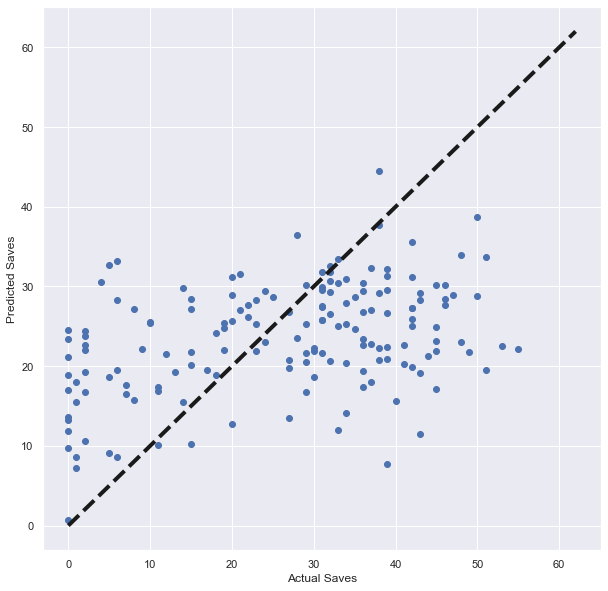

In [216]:
fig, ax = plt.subplots()
ax.scatter(test_y, test_set_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

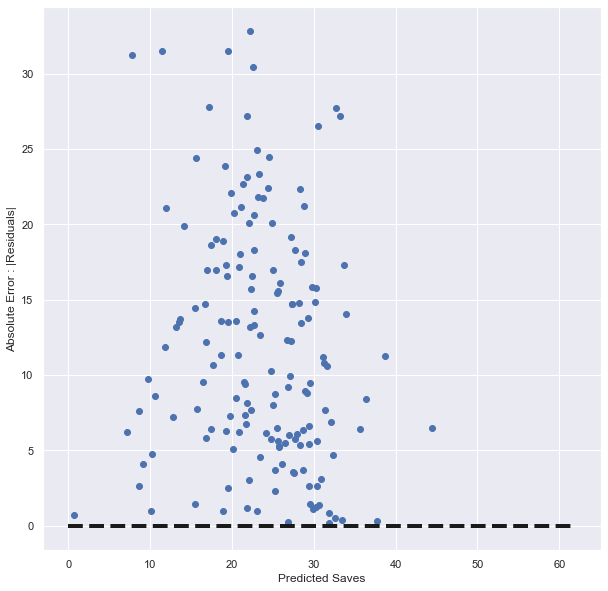

In [217]:
fig, ax = plt.subplots()
ax.scatter(test_set_pred, np.absolute(test_y-test_set_pred))
ax.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
ax.set_xlabel('Predicted Saves')
ax.set_ylabel('Absolute Error : |Residuals|')
plt.show()

# Ridge

In [218]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(train_X.values)

## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(train_X.values)

## Apply the scaler to the test set

X_te = std.transform(test_X.values)

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, train_y)

# This is the best alpha value it found - not far from the value
# selected using simple validation
ridge_model.alpha_

69.0551352016233

In [219]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(train_X.columns, ridge_model.coef_))

[('Age', -1.9660817517072364),
 ('W', 0.10266059796952261),
 ('L', 0.4976263353612782),
 ('ERA', -1.6458203114527565),
 ('G', -1.0869449199354293),
 ('GF', 2.5789350641214503),
 ('SV', 1.2612805239153493),
 ('IP', 0.2478325145525507),
 ('HR', -0.587090998795463),
 ('BF', -0.36257589926541006),
 ('ERA+', -0.5677676475227844),
 ('FIP', -0.5006471714369386),
 ('WHIP', -0.42437801499377126),
 ('H9', -0.730994644911897),
 ('HR9', -0.230446217454532),
 ('BB9', 0.2038535327971567),
 ('SO9', 0.6341674906465086),
 ('SO/W', 1.8058629997214934),
 ('HD', 0.5494353236451949),
 ('SV_Oppo', 1.2669126885594781),
 ('Blown_SV', 0.4421352077825474),
 ('Team_Change', -1.5835099861759037),
 ('Cumulative_Saves', 0.9004665330041709),
 ('Two_Year_Sum', -0.8760884499458745),
 ('Three_Year_Sum', -0.24901682851909296),
 ('BF/G', 1.1063963829685242),
 ('Mistakes/G', -1.2912928606493175)]

In [220]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)


In [221]:
RMSE_ridge = np.sqrt(mean_squared_error(test_y,test_set_pred))
RMSE_ridge

14.355771835143877

In [222]:
r2_score(test_y, test_set_pred)

0.12823428214161814

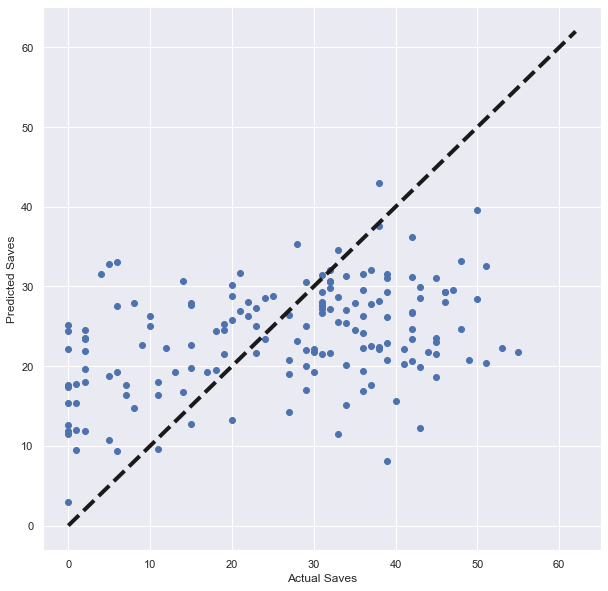

In [223]:
fig, ax = plt.subplots()
ax.scatter(test_y, test_set_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

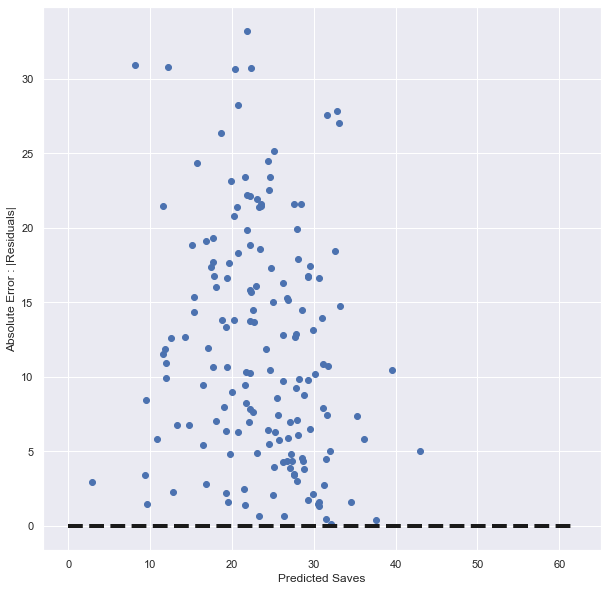

In [224]:
fig, ax = plt.subplots()
ax.scatter(test_set_pred, np.absolute(test_y-test_set_pred))
ax.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
ax.set_xlabel('Predicted Saves')
ax.set_ylabel('Absolute Error : |Residuals|')
plt.show()

In [225]:
metric_df['Residuals'] = np.absolute(test_y-test_set_pred)
metric_df.sort_values('Residuals',ascending=False).head(40)

Name  Year  Age   Tm   Lg  W   L   ERA   G  GS  GF  CG  \
864          John Smoltz  2001   34  ATL   NL  3   3  3.36  36   5  20   0   
621         Billy Wagner  2000   28  HOU   NL  2   4  6.18  28   0  19   0   
887            José Mesa  2003   37  PHI   NL  5   7  6.52  61   0  47   0   
1191         Randy Myers  1992   29  SDP   NL  3   6  4.29  66   0  57   0   
384          Jim Johnson  2011   28  BAL   AL  6   5  2.67  69   0  20   0   
501        José Valverde  2010   32  DET   AL  2   4  3.00  60   0  55   0   
408       Mariano Rivera  2011   41  NYY   AL  1   2  1.91  64   0  54   0   
529          Drew Storen  2011   23  WSN   NL  6   3  2.75  73   0  52   0   
1362        Bryan Harvey  1993   30  FLA   NL  1   5  1.70  59   0  54   0   
922       Eddie Guardado  2001   30  MIN   AL  7   1  3.51  67   0  26   0   
584         Joakim Soria  2011   27  KCR   AL  5   5  4.03  60   0  47   0   
662        David Aardsma  2010   28  SEA   AL  0   6  3.44  53   0  43   0   
490        Joel Hanrahan  2010   28  PIT   NL  4   1  3.62  72   0  27   0   
1037   Antonio Alfonseca  1999   27  FLA   NL  4   5  3.24  73   0  49   0   
229      Fernando Rodney  2013   36  TBR   AL  5   4  3.38  68   0  55   0   
245       Jeurys Familia  2014   24  NYM   NL  2   5  2.21  76   0  16   0   
1099     Michael Jackson  1994   29  SFG   NL  3   2  1.49  36   0  12   0   
409       Mariano Rivera  2012   42  NYY   AL  1   1  2.16   9   0   9   0   
249       Jeurys Familia  2018   28  TOT  MLB  8   6  3.13  70   0  36   0   
885            José Mesa  2001   35  PHI   NL  3   3  2.34  71   0  59   0   
1189         Randy Myers  1990   27  CIN   NL  4   6  2.08  66   0  59   0   
779            B.J. Ryan  2008   32  TOR   AL  2   4  2.95  60   0  48   0   
397       Mariano Rivera  2000   30  NYY   AL  7   4  2.85  66   0  61   0   
1354          Duane Ward  1992   28  TOR   AL  7   4  1.95  79   0  35   0   
809   Jason Isringhausen  1999   26  TOT  MLB  1   4  4.73  33   5  20   0   
961        Troy Percival  1997   27  ANA   AL  5   5  3.46  55   0  46   0   
1096     Michael Jackson  1991   26  SEA   AL  7   7  3.25  72   0  35   0   
96           Kirby Yates  2018   31  SDP   NL  5   3  2.14  65   0  28   0   
1269        Mark Wohlers  1997   27  ATL   NL  5   7  3.50  71   0  55   0   
1300           Lee Smith  1995   37  CAL   AL  0   5  3.47  52   0  51   0   
224      Fernando Rodney  2008   31  DET   AL  0   6  4.91  38   0  25   0   
1204          Doug Jones  1991   34  CLE   AL  4   8  5.54  36   4  29   0   
238            Ken Giles  2016   25  HOU   AL  2   5  4.11  69   0  24   0   
733          Bobby Jenks  2005   24  CHW   AL  1   1  2.75  32   0  18   0   
753           Todd Jones  1999   31  DET   AL  4   4  3.80  65   0  62   0   
75         Mark Melancon  2014   29  PIT   NL  3   5  1.90  72   0  48   0   
566    Francisco Cordero  2008   33  CIN   NL  5   4  3.33  72   0  63   0   
1136          Tom Gordon  1997   29  BOS   AL  6  10  3.74  42  25  16   2   
454          Sergio Romo  2016   33  SFG   NL  1   0  2.64  40   0  13   0   
521            J.J. Putz  2008   31  SEA   AL  6   5  3.88  47   0  35   0   

      SHO  SV     IP    H   R  ER  HR  BB  IBB   SO  HBP  BK  WP   BF  ERA+  \
864     0  10   59.0   53  24  22   7  10    2   57    2   0   0  238   133   
621     0   6   27.2   28  19  19   6  18    0   28    1   0   7  129    81   
887     0  24   58.0   71  44  42   7  31    2   45    1   0   3  273    62   
1191    0  38   79.2   84  38  38   7  34    3   66    1   0   5  348    84   
384     0   9   91.0   80  30  27   5  21    3   58    2   1   2  366   158   
501     0  26   63.0   41  24  21   5  32    1   63    3   0   3  259   140   
408     0  44   61.1   47  13  13   3   8    2   60    2   0   1  233   226   
529     0  43   75.1   57  24  23   8  20    4   74    2   0   2  303   140   
1362    0  45   69.0   45  14  13   4  13    2   73    0   1   0  264   252   
922     0  12   66.2   47  27  

In [226]:
df_2019

Name  Year  Age   Tm   Lg  W   L    ERA   G  GS  GF  CG  SHO  \
8           Brad Hand  2019   29  CLE   AL  6   4   3.30  60   0  54   0    0   
18      Liam Hendriks  2019   30  OAK   AL  4   4   1.80  75   2  41   0    0   
22         Josh Hader  2019   25  MIL   NL  3   5   2.62  61   0  46   0    0   
30        Alex Colomé  2019   30  CHW   AL  4   5   2.80  62   0  54   0    0   
41   Brandon Kintzler  2019   34  CHC   NL  3   3   2.68  62   0  10   0    0   
49       Ryan Pressly  2019   30  HOU   AL  2   3   2.32  55   0   8   0    0   
60      Kenley Jansen  2019   31  LAD   NL  5   3   3.71  62   0  51   0    0   
68   Trevor Rosenthal  2019   29  TOT  MLB  0   1  13.50  22   0   8   0    0   
80      Mark Melancon  2019   34  TOT   NL  5   2   3.61  66   0  34   0    0   
90      Daniel Hudson  2019   32  TOT  MLB  9   3   2.47  69   1  25   0    0   
97        Kirby Yates  2019   32  SDP   NL  0   5   1.19  60   0  51   0    0   
103     Roberto Osuna  2019   24  HOU   AL  4   3   2.63  66   0  56   0    0   
113   Aroldis Chapman  2019   31  NYY   AL  3   2   2.21  60   0  53   0    0   
121        Will Smith  2019   29  SFG   NL  6   0   2.76  63   0  52   0    0   
127   Raisel Iglesias  2019   29  CIN   NL  3  12   4.16  68   0  55   0    0   
132     Taylor Rogers  2019   28  MIN   AL  2   4   2.61  60   0  36   0    0   
145       Ian Kennedy  2019   34  KCR   AL  3   2   3.41  63   0  51   0    0   
150        Edwin Díaz  2019   25  NYM   NL  2   7   5.59  66   0  48   0    0   
162        Wade Davis  2019   33  COL   NL  1   6   8.65  50   0  32   0    0   
173     Craig Kimbrel  2019   31  CHC   NL  0   4   6.53  23   0  17   0    0   
180     Blake Treinen  2019   31  OAK   AL  6   5   4.91  57   0  35   0    0   
186    Felipe Vázquez  2019   27  PIT   NL  5   1   1.65  56   0  47   0    0   
192      Shane Greene  2019   30  TOT  MLB  0   3   2.30  65   0  37   0    0   
201    Brad Boxberger  2019   31  KCR   AL  1   3   5.40  29   0   9   0    0   
211      Greg Holland  2019   33  ARI   NL  1   2   4.54  40   0  27   0    0   
235   Fernando Rodney  2019   42  TOT  MLB  0   5   5.66  55   0  16   0    0   
241         Ken Giles  2019   28  TOR   AL  2   3   1.87  53   0  44   0    0   
250    Jeurys Familia  2019   29  NYM   NL  4   2   5.70  66   0  14   0    0   
260      Zack Britton  2019   31  NYY   AL  3   1   1.91  66   0  15   0    0   
292         Sam Dyson  2019   31  TOT  MLB  5   1   3.32  61   0   8   0    0   
304   David Robertson  2019   34  PHI   NL  0   1   5.40   7   0   3   0    0   
314     Jeanmar Gómez  2019   31  TEX   AL  1   0   8.22  16   0   6   0    0   
355     Andrew Miller  2019   34  STL   NL  5   6   4.45  73   0  11   0    0   
365      Steve Cishek  2019   33  CHC   NL  4   6   2.95  70   0  23   0    0   
457       Sergio Romo  2019   36  TOT  MLB  2   1   3.43  65   0  33   0    0   
591      Joakim Soria  2019   35  OAK   AL  2   4   4.30  71   1  21   0    0   

     SV    IP   H   R  ER  HR  BB  IBB   SO  HBP  BK  WP   BF  ERA+   FIP  \
8    34  57.1  53  21  21   6  18    5   84    4   0   0  242   145  2.80   
18   25  85.0  61  18  17   5  21    5  124    2   0   7  332   237  1.87   
22   37  75.2  41  24  22  15  20    2  138    4   0   0  289   170  3.10   
30   30  61.0  42  28  19   7  23    2   55    1   0   4  249   164  4.08   
41    1  57.0  45  18  17   5  13    3   48    4   0   0  227   163  3.56   
49    3  54.1  37  15  14   6  12    0   72    0   0   4  211   200  2.66   
60   33  63.0  51  28  26   9  16    0   80    4   3   2  263   112  3.48   
68    0  15.1  11  24  23   0  26    0   17    4   0   9   85    36  6.87   
80   12  67.1  71  28  27   4  18    2   68    2   0   4  284   122  2.86   
90    8  73.0  56  25  20   8  27    2   71    4   0   2  304   185  3.97   
97   41  60.2  41  14   8   2  13    1  101    7   0   2  243   354  1.30   
103  38  65.0  45  20  19   8  12    0   73    2   0   1  253   176  3.21   
113  37  57.0  38 

In [227]:
model_2019= df_2019.drop(columns = ['Year','Name','Tm','Lg','GS','CG','SHO','Previous_Year_SV','Two_Year_Ago','HBP','BK','WP','R','ER','H','BB','IBB','SO'])

X_2019 = model_2019.drop(columns='Target_SV')
y_2019 = model_2019['Target_SV']
X_2019.head()

Age  W  L   ERA   G  GF  SV    IP  HR   BF  ERA+   FIP   WHIP   H9  HR9  \
8    29  6  4  3.30  60  54  34  57.1   6  242   145  2.80  1.238  8.3  0.9   
18   30  4  4  1.80  75  41  25  85.0   5  332   237  1.87  0.965  6.5  0.5   
22   25  3  5  2.62  61  46  37  75.2  15  289   170  3.10  0.806  4.9  1.8   
30   30  4  5  2.80  62  54  30  61.0   7  249   164  4.08  1.066  6.2  1.0   
41   34  3  3  2.68  62  10   1  57.0   5  227   163  3.56  1.018  7.1  0.8   

    BB9   SO9  SO/W  HD  SV_Oppo  Blown_SV  Team_Change  Cumulative_Saves  \
8   2.8  13.2  4.67   0       39         5            1                89   
18  2.2  13.1  5.90   8       32         7            0                26   
22  2.4  16.4  6.90   6       44         7            0                49   
30  3.4   8.1  2.39   0       33         3            1               126   
41  2.1   7.6  3.69  17        3         2            1                49   

    Two_Year_Sum  Three_Year_Sum      BF/G  Mistakes/G  
8             66              87  4.033333    0.066667  
18            25              26  4.426667    0.120000  
22            49              49  4.737705    0.065574  
30            42              89  4.016129    0.080645  
41             3              32  3.661290    0.064516

In [231]:
#Standardize the data from 2019 based on previous data
transform_2019 = std.transform(X_2019.values)
print(transform_2019.shape)
# Make predictions for next years
predictions_2020 = ridge_model.predict(transform_2019)
df_2019['Predictions 2020'] = predictions_2020*60/162
df_2019['Shortened 2020']= df_2019['Target_SV']
df_2019[['Name','Tm','Predictions 2020','Shortened 2020']].sort_values(by=['Shortened 2020'],ascending=False)

(36, 27)


Name   Tm  Predictions 2020  Shortened 2020
8           Brad Hand  CLE          9.361584              16
18      Liam Hendriks  OAK         10.851351              14
22         Josh Hader  MIL         13.256671              13
30        Alex Colomé  CHW          8.046404              12
41   Brandon Kintzler  CHC          4.020839              12
49       Ryan Pressly  HOU          7.243675              12
60      Kenley Jansen  LAD          9.731868              11
68   Trevor Rosenthal  TOT         -5.498891              11
80      Mark Melancon  TOT          5.201383              11
90      Daniel Hudson  TOT          4.997000              10
132     Taylor Rogers  MIN         11.215005               9
260      Zack Britton  NYY          5.533135               8
127   Raisel Iglesias  CIN          9.861784               8
211      Greg Holland  ARI          4.772430               6
150        Edwin Díaz  NYM          6.533662               6
457       Sergio Romo  TOT          5.101654               5
355     Andrew Miller  STL          2.143728               4
113   Aroldis Chapman  NYY         11.164705               3
173     Craig Kimbrel  CHC          2.956546               2
162        Wade Davis  COL          2.475283               2
97        Kirby Yates  SDP         12.617570               2
591      Joakim Soria  OAK          4.046197               2
180     Blake Treinen  OAK          5.733644               1
241         Ken Giles  TOR          9.789805               1
103     Roberto Osuna  HOU         11.515728               1
186    Felipe Vázquez  PIT         11.416347               0
192      Shane Greene  TOT          7.307897               0
201    Brad Boxberger  KCR          2.737011               0
145       Ian Kennedy  KCR          8.772959               0
235   Fernando Rodney  TOT          2.483423               0
250    Jeurys Familia  NYM          1.971579               0
121        Will Smith  SFG         10.621669               0
292         Sam Dyson  TOT          4.524786               0
304   David Robertson  PHI          2.435872               0
314     Jeanmar Gómez  TEX         -1.040559               0
365      Steve Cishek  CHC          5.062896               0

In [232]:
df_2019[['Name','Tm','Predictions 2020','Shortened 2020']].sort_values(by=['Predictions 2020'],ascending=False)

Name   Tm  Predictions 2020  Shortened 2020
22         Josh Hader  MIL         13.256671              13
97        Kirby Yates  SDP         12.617570               2
103     Roberto Osuna  HOU         11.515728               1
186    Felipe Vázquez  PIT         11.416347               0
132     Taylor Rogers  MIN         11.215005               9
113   Aroldis Chapman  NYY         11.164705               3
18      Liam Hendriks  OAK         10.851351              14
121        Will Smith  SFG         10.621669               0
127   Raisel Iglesias  CIN          9.861784               8
241         Ken Giles  TOR          9.789805               1
60      Kenley Jansen  LAD          9.731868              11
8           Brad Hand  CLE          9.361584              16
145       Ian Kennedy  KCR          8.772959               0
30        Alex Colomé  CHW          8.046404              12
192      Shane Greene  TOT          7.307897               0
49       Ryan Pressly  HOU          7.243675              12
150        Edwin Díaz  NYM          6.533662               6
180     Blake Treinen  OAK          5.733644               1
260      Zack Britton  NYY          5.533135               8
80      Mark Melancon  TOT          5.201383              11
457       Sergio Romo  TOT          5.101654               5
365      Steve Cishek  CHC          5.062896               0
90      Daniel Hudson  TOT          4.997000              10
211      Greg Holland  ARI          4.772430               6
292         Sam Dyson  TOT          4.524786               0
591      Joakim Soria  OAK          4.046197               2
41   Brandon Kintzler  CHC          4.020839              12
173     Craig Kimbrel  CHC          2.956546               2
201    Brad Boxberger  KCR          2.737011               0
235   Fernando Rodney  TOT          2.483423               0
162        Wade Davis  COL          2.475283               2
304   David Robertson  PHI          2.435872               0
355     Andrew Miller  STL          2.143728               4
250    Jeurys Familia  NYM          1.971579               0
314     Jeanmar Gómez  TEX         -1.040559               0
68   Trevor Rosenthal  TOT         -5.498891              11